## ALGORITMO DE CLASIFICACION II

In [1]:
#Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

In [2]:
#importamos los datos 

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#modificamos el nombre de la columna a Target
df.rename({'Churn': 'Target'}, axis=1, inplace=True)

In [6]:
#cambiamos los valores de todas las columnas object a int codificando los valores 
df=df.drop("customerID", axis=1)
df = df.replace("Yes", 1).replace("No", 0)
df = df.replace("No internet service", 2)
df['gender'] = df['gender'].replace("Female", 1).replace("Male", 0)
df['InternetService'] = df['InternetService'].replace("0", 0).replace("Fiber optic", 1).replace("DSL", 2)
df['MultipleLines'] = df['MultipleLines'].replace("No phone service", 3)
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df['Contract'] = df['Contract'].replace("Month-to-month", 0).replace("One year", 1).replace("Two year", 2)
df['PaymentMethod'] = df['Contract'].replace("Electronic check", 0).replace("Mailed check", 1).replace("Bank transfer (automatic)", 2).replace("Credit card (automatic)", 3)

In [7]:
#Seperamos en X e y
X = df.drop("Target", axis=1) #Elimino de mi dataset la variable a predecir
y = df.Target #Defino el Target

In [8]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

### APICACION DE KNN

In [9]:
# from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
prediccion = knn.predict(X_test)
print(prediccion)

[1 0 0 ... 0 1 0]


In [11]:
prediccion

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
print(confusion_matrix(y_test,prediccion))
print(classification_report(y_test,prediccion))

[[1341  198]
 [ 294  280]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1539
           1       0.59      0.49      0.53       574

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



### pruebas con modificacion de vecinos manualmente . vemos que con 3 vecinos ya supera el modelo anterior  :

#### n_neighbors=1 - accuracy 0 73  
#### n_neighbors=3 - accuracy 0 77 

## mejorando el modelo

In [14]:
error_rate=[]

for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0.5, 0, 'K')

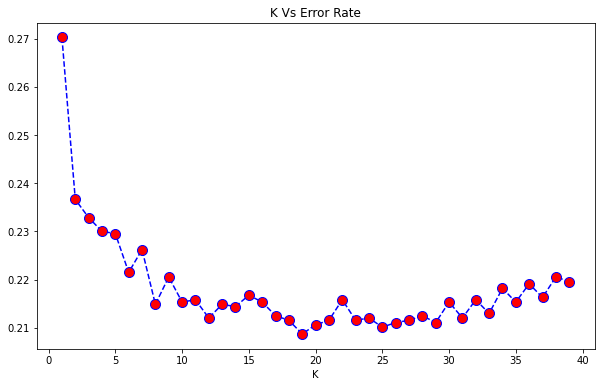

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',markersize=10,markerfacecolor='red',marker='o')
plt.title('K Vs Error Rate')
plt.xlabel('K')

In [16]:
# elejimos K= 19 y recalculamos 

knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
prediccion_optimizada= knn.predict(X_test)
print(confusion_matrix(y_test,prediccion_optimizada))
print(classification_report(y_test,prediccion_optimizada))

[[1433  106]
 [ 335  239]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1539
           1       0.69      0.42      0.52       574

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



## Conclusion : el accuracy mejoro a 79, sobre todo la prediccion del churn a 69

## SVM 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)
X_array = sc.transform(X.values)
X = pd.DataFrame(X_array, index=X.index, columns=X.columns)

In [ ]:
#X_train.to_numpy()

In [17]:
X2=X.drop('gender',axis=1)
X2=X2.drop('SeniorCitizen',axis=1)
X2=X2.drop('Partner',axis=1)
X2=X2.drop('Dependents',axis=1)
X2=X2.drop('PhoneService',axis=1)
X2=X2.drop('MultipleLines',axis=1)
X2=X2.drop('InternetService',axis=1)
X2=X2.drop('OnlineSecurity',axis=1)
X2=X2.drop('OnlineBackup',axis=1)
X2=X2.drop('DeviceProtection',axis=1)
X2=X2.drop('TechSupport',axis=1)
X2=X2.drop('StreamingTV',axis=1)
X2=X2.drop('StreamingMovies',axis=1)
X2=X2.drop('Contract',axis=1)
X2=X2.drop('PaperlessBilling',axis=1)
X2=X2.drop('MonthlyCharges',axis=1)
X2=X2.drop('TotalCharges',axis=1)

In [18]:
X3=X2.to_numpy()

In [19]:
X4=X_train.drop('gender',axis=1)
X4=X4.drop('SeniorCitizen',axis=1)
X4=X4.drop('Partner',axis=1)
X4=X4.drop('Dependents',axis=1)
X4=X4.drop('PhoneService',axis=1)
X4=X4.drop('MultipleLines',axis=1)
X4=X4.drop('InternetService',axis=1)
X4=X4.drop('OnlineSecurity',axis=1)
X4=X4.drop('OnlineBackup',axis=1)
X4=X4.drop('DeviceProtection',axis=1)
X4=X4.drop('TechSupport',axis=1)
X4=X4.drop('StreamingTV',axis=1)
X4=X4.drop('StreamingMovies',axis=1)
X4=X4.drop('Contract',axis=1)
X4=X4.drop('PaperlessBilling',axis=1)
X4=X4.drop('MonthlyCharges',axis=1)
X4=X4.drop('TotalCharges',axis=1)

In [20]:
X5=X4.to_numpy()

In [21]:
X5

array([[54,  1],
       [ 1,  0],
       [13,  1],
       ...,
       [12,  0],
       [12,  0],
       [26,  1]], dtype=int64)

In [22]:
y2=y_train.to_numpy()

In [23]:
h = 0.01

x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

### modelado

In [26]:

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X5, y2)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr').fit(X5, y2)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr').fit(X5, y2)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr').fit(X5, y2)

## base mesh

In [ ]:

for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
# Plot also the training points
    plt.scatter(X3[:, 0], X3[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('PaymentMethod')
    plt.ylabel('tenure')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()
